# 数据处理

数据提取

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_0 = pd.read_csv("建模数据.csv")
data_0.head()

,source_order_no,y,TOTAL_PRICE,DOWN_PAY,LOAN_AMT,MTH_REPAY_AMT,INSTALL_NUM,FILE_TYPE,IS_INSUUANCE,GOODS_TYPE,...,als_lst_id_bank_csinteday,als_lst_id_nbank_inteday,als_lst_id_nbank_consnum,als_lst_id_nbank_csinteday,als_lst_cell_bank_inteday,als_lst_cell_bank_consnum,als_lst_cell_bank_csinteday,als_lst_cell_nbank_inteday,als_lst_cell_nbank_consnum,als_lst_cell_nbank_csinteday
0,8141,1,3657,300,3357,303,12,1,否,手机,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0
1,6010,0,5267,2500,2767,327,9,0,否,电动/摩托车,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0
2,8891,0,5001,0,5001,312,18,1,否,手机,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0
3,913,0,3161,600,2561,274,10,1,是,手机,...,NaN,1.0,1.0,1.0,182.0,1.0,1.0,1.0,1.0,1.0
4,1216,0,3047,0,3047,326,10,1,否,电动/摩托车,...,1.0,213.0,1.0,1.0,287.0,1.0,1.0,213.0,1.0,1.0


In [2]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 886 entries, source_order_no to als_lst_cell_nbank_csinteday
dtypes: float64(831), int64(15), object(40)
memory usage: 20.3+ MB


## 缺失值清理

将缺少大于80%的属性删去

In [3]:
missing_percentage=data_0.isnull().mean()
columns_drop=missing_percentage[missing_percentage>0.8].index
person_a_del=data_0.drop(columns=columns_drop)

将缺失达50%-80%的属性选出并根据实际意义考虑是否丢弃

In [4]:
missing_percentage=person_a_del.isnull().mean()
columns_tentative=missing_percentage[missing_percentage>0.5]
columns_tentative

RENT_FEE                          0.774667
SPOUSE_NAME                       0.521000
IS_SPOUSE_CTC_TRUE                0.598000
als_m3_id_max_inteday             0.708000
als_m3_id_min_inteday             0.708000
als_m3_id_nbank_max_inteday       0.742667
als_m3_id_nbank_min_inteday       0.742667
als_m3_cell_max_inteday           0.727667
als_m3_cell_min_inteday           0.727667
als_m3_cell_nbank_max_inteday     0.761000
als_m3_cell_nbank_min_inteday     0.761000
als_m6_id_max_inteday             0.602333
als_m6_id_min_inteday             0.602333
als_m6_id_nbank_max_inteday       0.644333
als_m6_id_nbank_min_inteday       0.644333
als_m6_cell_max_inteday           0.632333
als_m6_cell_min_inteday           0.632333
als_m6_cell_nbank_max_inteday     0.674000
als_m6_cell_nbank_min_inteday     0.674000
als_m12_id_max_inteday            0.502333
als_m12_id_min_inteday            0.502333
als_m12_id_pdl_orgnum             0.779000
als_m12_id_pdl_allnum             0.779000
als_m12_id_

In [5]:
person_a_del[columns_tentative.index]

,RENT_FEE,SPOUSE_NAME,IS_SPOUSE_CTC_TRUE,als_m3_id_max_inteday,als_m3_id_min_inteday,als_m3_id_nbank_max_inteday,als_m3_id_nbank_min_inteday,als_m3_cell_max_inteday,als_m3_cell_min_inteday,als_m3_cell_nbank_max_inteday,...,als_m12_id_nbank_cons_allnum,als_m12_id_nbank_cons_orgnum,als_m12_id_nbank_max_inteday,als_m12_id_nbank_min_inteday,als_m12_cell_max_inteday,als_m12_cell_min_inteday,als_m12_cell_nbank_cons_allnum,als_m12_cell_nbank_cons_orgnum,als_m12_cell_nbank_max_inteday,als_m12_cell_nbank_min_inteday
0,0-500,NaN,NaN,33.0,2.0,33.0,2.0,NaN,NaN,NaN,...,4.0,2.0,91.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,冯*,是,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,179.0,179.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,罗**,是,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0-500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,181.0,123.0,NaN,NaN,NaN,NaN
4,0-500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,0.0,66.0,0.0,NaN,NaN,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,NaN,NaN,39.0,0.0,39.0,0.0,39.0,0.0,39.0,...,NaN,NaN,228.0,0.0,39.0,0.0,NaN,NaN,39.0,0.0
2996,0-500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2997,0-500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,242.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2998,0-500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


缺失50%-80%的属性都不是很重要，删去

In [6]:
person_a_del_1 = person_a_del.drop(columns=columns_tentative.index)
person_a_del_1.isnull().mean()

source_order_no                 0.000000
y                               0.000000
TOTAL_PRICE                     0.000000
DOWN_PAY                        0.000000
LOAN_AMT                        0.000000
                                  ...   
als_lst_id_nbank_consnum        0.040667
als_lst_id_nbank_csinteday      0.040667
als_lst_cell_nbank_inteday      0.027000
als_lst_cell_nbank_consnum      0.027000
als_lst_cell_nbank_csinteday    0.027000
Length: 268, dtype: float64

此时查看发现最高的缺失率为30%左右可以接受，停止缺失值清理

## 重复值与极端值清理

In [7]:
data_1=person_a_del_1
data_1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

将一些非重复率大于80%的属性选出，查看并选择一些不重要的删去,同时将一些一个属性只有一个值的属性删去，将极端属性清理

In [8]:
unique_ratios = data_1.nunique() / len(data_1)
nunique = data_1.nunique()
constant_features = unique_ratios[unique_ratios > 0.8].index
# 保留一个标识属性
protected_features = ['source_order_no']
constant_features = [col for col in constant_features if col not in protected_features]
#删去只有一个值的属性
single_value_features = nunique[nunique == 1].index.tolist()


data_2 = data_1.drop(columns=constant_features)
data_2 =data_2.drop(columns=single_value_features)

根据现实意义删去一些属性

In [9]:
noneed_features =['BRAND','GOODS_TYPE','SEX','SINGE_DATE','IS_REAL_NAME','BUSI_DT','FIRST_REPAY_DAY','PRODUCT_ID','CHANNEL_ID','RACE',
                  'POSITION','REGIST_DATE',
                  'MARQUES','SIGN_DATE','IS_BACK_SALE','PRV','PRV1']
data_3 = data_2.drop(columns=noneed_features)
num_df=data_3.select_dtypes(exclude='object')

## 非数值型转换

In [10]:
#给非数值型属性缺失值填充“缺失”
for col in data_3.select_dtypes(include=['object', 'category']).columns:
    data_3[col] = data_3[col].fillna('缺失')

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# 有序类别特征
ordinal_cols = ['LIVE_TIME_SPAN', 'INCOME','WORK_TIME_SPAN','MOBILE_TIME_SPAN','MTH_TEL_BILL','ORG_SIZE']
ordinal_encoder = OrdinalEncoder()
data_3[ordinal_cols] = ordinal_encoder.fit_transform(data_3[ordinal_cols])


cap_cols=data_3.select_dtypes(include='object')
# 无序类别特征
onehot_encoder=OneHotEncoder(
    sparse_output=False,      
    handle_unknown='ignore'  
)
encoded_data = onehot_encoder.fit_transform(data_3[cap_cols.columns])
new_columns = onehot_encoder.get_feature_names_out(cap_cols.columns)
encoded_df = pd.DataFrame(encoded_data, columns=new_columns)
data_4 = data_3.drop(columns=cap_cols)

# 将编码后的列添加到数据集
data_4 = pd.concat([data_4, encoded_df], axis=1)



## 缺失值补充

In [11]:
def smart_fill(df, col):
    #根据数据分布选择填充值
    skewness = df[col].skew() #计算数据偏度
    
    if abs(skewness) < 0.5:  
        return df[col].mean()
    elif 0.5 <= abs(skewness) < 1:  
        return df[col].median()
    else:  
        return df[col].quantile(0.25) if skewness > 0 else df[col].quantile(0.75)

for col in num_df:
    fill_value = smart_fill(data_4, col)
    data_4[col] = data_4[col].fillna(fill_value)

# 聚类操作

## PCA+K-means

In [12]:
cluster_data = data_4.drop(columns='y')

from sklearn.preprocessing import StandardScaler

#数据标准化
scaler = StandardScaler()
scaler_data =scaler.fit_transform(data_4)

In [13]:
#降维
from sklearn.decomposition import PCA

pca_model=PCA(n_components=0.95,random_state=42)
pca_data = pca_model.fit_transform(scaler_data)

#解释方差比例
pca_model.explained_variance_ratio_.sum()


0.9518503693976016

In [14]:
#原维度
data_4.shape[1]

266

In [15]:
#降维后维度
pca_model.n_components_

76

寻找最优K值

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


k_range=range(2,21)
k_values=list(k_range)
sse_scores=[]
silhouette_scores=[]

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
    labels = kmeans.fit_predict(pca_data)

    #肘部法则
    sse =kmeans.inertia_
    sse_scores.append(sse)

    #轮廓系数
    if len(np.unique(labels)) > 1:  
        sil_score = silhouette_score(pca_data, labels)
        silhouette_scores.append(sil_score)
    else:
       silhouette_scores.append(-1)

系数可视化

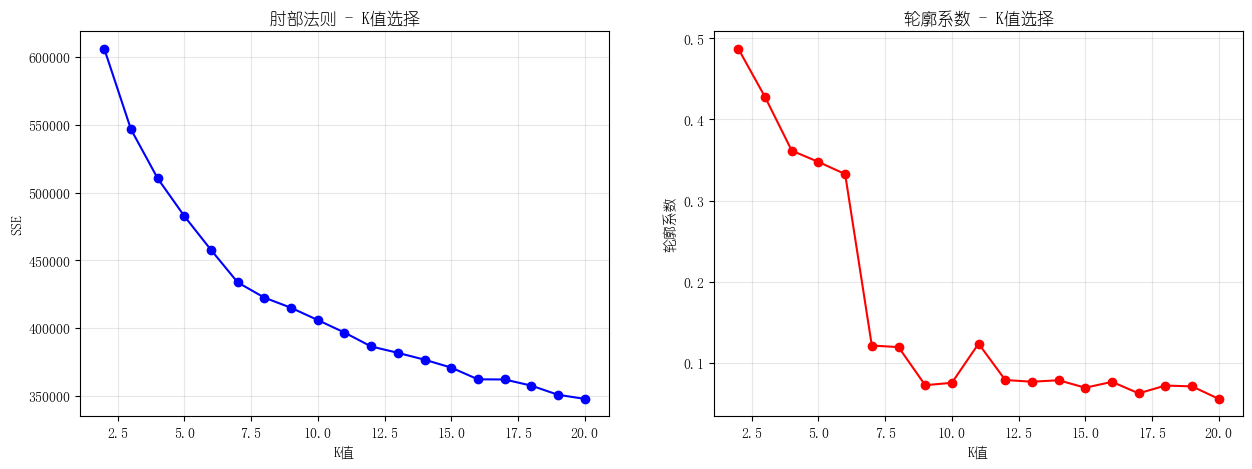

In [17]:

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font",family='YouYuan')

# 绘制K值选择图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
# 肘部法则图
ax1.plot(k_values, sse_scores, 'bo-')
ax1.set_xlabel('K值')
ax1.set_ylabel('SSE')
ax1.set_title('肘部法则 - K值选择')
ax1.grid(True, alpha=0.3)
        
# 轮廓系数图
ax2.plot(k_values, silhouette_scores, 'ro-')
ax2.set_xlabel('K值')
ax2.set_ylabel('轮廓系数')
ax2.set_title('轮廓系数 - K值选择')
ax2.grid(True, alpha=0.3)

综合图像选择k=5,k=2

执行kmeans聚类

In [18]:
from sklearn.cluster import KMeans

results={}

kmeans_k2=KMeans(n_clusters=2,random_state=42,n_init=10)
labels_k2=kmeans_k2.fit_predict(pca_data)

results['kmeans_k2']={
    'model':kmeans_k2,
    'labels':labels_k2,
    'n_clusters':2,
    'cluster_centers':kmeans_k2.cluster_centers_
}

kmeans_k5=KMeans(n_clusters=5,random_state=42,n_init=10)
labels_k5=kmeans_k5.fit_predict(pca_data)

results['kmeans_k5']={
    'model':kmeans_k5,
    'labels':labels_k5,
    'n_clusters':5,
    'cluster_centers':kmeans_k5.cluster_centers_
}


## 评估

In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


def evaluate_clustering(method_name, labels):
        print(f"\n{method_name.upper()} 聚类评估结果:")
        print("\n")
        
        valid_mask = labels != -1
        valid_data = pca_data[valid_mask]
        valid_labels = labels[valid_mask]
        
        if len(np.unique(valid_labels)) < 2:
            print("无法计算评估指标：簇数量少于2")
            return
        
        # 轮廓系数
        sil_score = silhouette_score(valid_data, valid_labels)
        
        # Calinski-Harabasz指数
        ch_score = calinski_harabasz_score(valid_data, valid_labels)
        
        # Davies-Bouldin指数
        db_score = davies_bouldin_score(valid_data, valid_labels)
        
        print(f"轮廓系数 (Silhouette Score): {sil_score:.4f}")
        print(f"  - 范围: [-1, 1]，越接近1越好")
        print(f"Calinski-Harabasz指数: {ch_score:.2f}")
        print(f"  - 越大越好，表示簇间分离度高、簇内紧密度高")
        print(f"Davies-Bouldin指数: {db_score:.4f}")
        print(f"  - 越小越好，表示簇间分离度好")
        
        unique_labels, counts = np.unique(valid_labels, return_counts=True)
        print(f"\n簇大小分布:")
        for label, count in zip(unique_labels, counts):
            print(f"  簇 {label}: {count} 个样本 ({count/len(valid_labels)*100:.1f}%)")
         
        results[method_name]['evaluation'] = {
            'silhouette_score': sil_score,
            'calinski_harabasz_score': ch_score,
            'davies_bouldin_score': db_score,
            'cluster_sizes': dict(zip(unique_labels, counts))
        }

In [20]:
evaluate_clustering('kmeans_k2',labels_k2)


KMEANS_K2 聚类评估结果:


轮廓系数 (Silhouette Score): 0.4870
  - 范围: [-1, 1]，越接近1越好
Calinski-Harabasz指数: 760.15
  - 越大越好，表示簇间分离度高、簇内紧密度高
Davies-Bouldin指数: 1.6410
  - 越小越好，表示簇间分离度好

簇大小分布:
  簇 0: 407 个样本 (13.6%)
  簇 1: 2593 个样本 (86.4%)


In [21]:
evaluate_clustering('kmeans_k5',labels_k5)


KMEANS_K5 聚类评估结果:


轮廓系数 (Silhouette Score): 0.3477
  - 范围: [-1, 1]，越接近1越好
Calinski-Harabasz指数: 429.65
  - 越大越好，表示簇间分离度高、簇内紧密度高
Davies-Bouldin指数: 1.6856
  - 越小越好，表示簇间分离度好

簇大小分布:
  簇 0: 2368 个样本 (78.9%)
  簇 1: 311 个样本 (10.4%)
  簇 2: 275 个样本 (9.2%)
  簇 3: 26 个样本 (0.9%)
  簇 4: 20 个样本 (0.7%)


## 可视化

In [22]:
def visualize_clusters(method='both', figsize=(15, 6)):
    if method == 'both':
        methods = ['kmeans_k2', 'kmeans_k5','dbscan']
    else:
        methods = [method]
        
    n_methods = len(methods)
    fig, axes = plt.subplots(1, n_methods, figsize=(figsize[0], figsize[1]))
        
    if n_methods == 1:
        axes = [axes]
        
    colors = plt.cm.Set3(np.linspace(0, 1, 12))
        
    for i, method_name in enumerate(methods):
        if method_name not in results:
            continue
                
        labels = results[method_name]['labels']
            
        scatter = axes[i].scatter(
            pca_data[:, 0], 
            pca_data[:, 10], 
            c=labels, 
            cmap='Set3', 
            alpha=0.7,
            s=30
        )
            
        axes[i].set_xlabel(f'PC0 ({pca_model.explained_variance_ratio_[0]:.2%} variance)')
        axes[i].set_ylabel(f'PC10 ({pca_model.explained_variance_ratio_[1]:.2%} variance)')
        axes[i].set_title(f'{method_name.upper()} 聚类结果')
        axes[i].grid(True, alpha=0.3)
            
        # 添加颜色条
        plt.colorbar(scatter, ax=axes[i])
        
        plt.tight_layout()
        plt.show()

C:\Users\xxin\AppData\Local\Temp\ipykernel_8508\1715107809.py:38: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


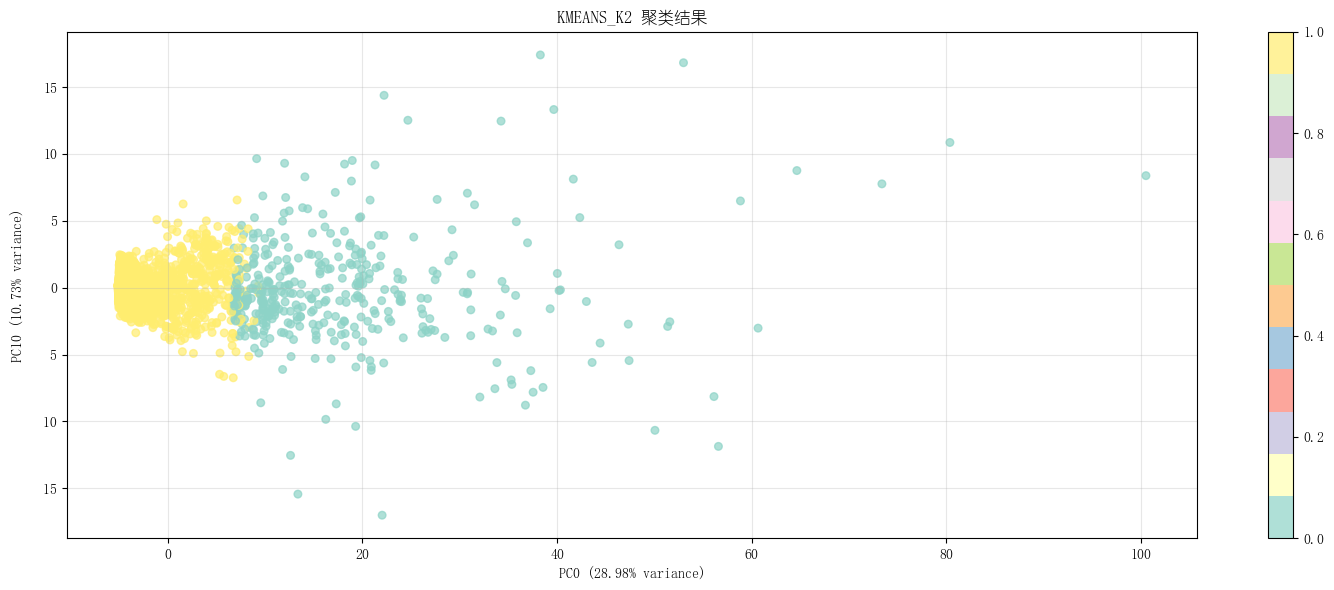

In [23]:
visualize_clusters(method="kmeans_k2")

C:\Users\xxin\AppData\Local\Temp\ipykernel_8508\1715107809.py:38: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


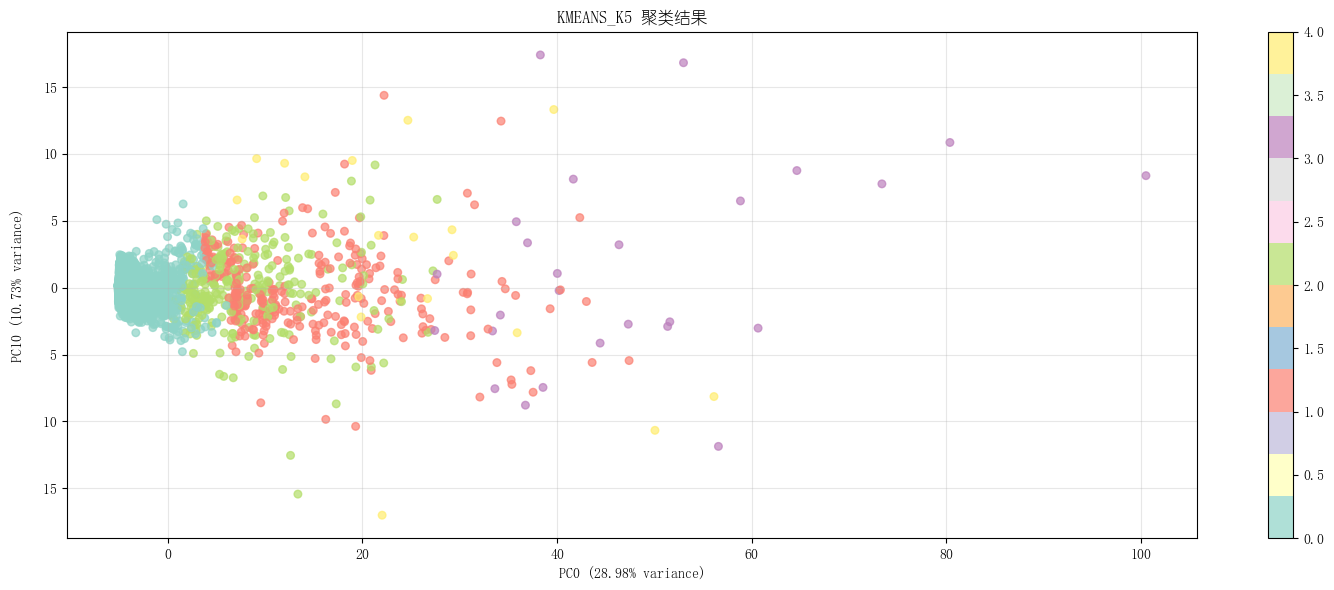

In [24]:
visualize_clusters(method="kmeans_k5")

## 比较

In [25]:
def compare_methods():
    print("聚类方法比较")
    print("\n")
        
    comparison_data = []
        
    for method_name, result in results.items():
        if 'evaluation' in result:
            eval_metrics = result['evaluation']
            comparison_data.append({
                '方法': method_name.upper(),
                '簇数量': result.get('n_clusters'),
                '轮廓系数': f"{eval_metrics['silhouette_score']:.4f}",
                'CH指数': f"{eval_metrics['calinski_harabasz_score']:.2f}",
                'DB指数': f"{eval_metrics['davies_bouldin_score']:.4f}"
            })
        
    if comparison_data:
        comparison_df = pd.DataFrame(comparison_data)
        
    return comparison_df
            

In [26]:
compare_methods()

聚类方法比较




,方法,簇数量,轮廓系数,CH指数,DB指数
0,KMEANS_K2,2,0.4870,760.15,1.6410
1,KMEANS_K5,5,0.3477,429.65,1.6856


## 类别分析

统计分析函数

In [27]:
from tabulate import tabulate

def cluster_summary_statistics(unique_labels,data,labels_ana,print_flag=True):
    if(print_flag):
        print("\n" + "="*60)
        print("各聚类汇总统计")
        print("="*60)
        
    summary_stats = []
        
    for cluster_id in unique_labels:
        cluster_data = data[labels_ana == cluster_id]
            
        stats_dict = {
            '聚类ID': cluster_id,
            '样本数量': len(cluster_data),
            '样本比例(%)': f"{len(cluster_data)/len(data)*100:.2f}",
            '特征均值': cluster_data.mean().mean(),
            '特征标准差': cluster_data.std().mean(),
            '特征中位数': cluster_data.median().mean()
        }
        summary_stats.append(stats_dict)
        
    summary_df = pd.DataFrame(summary_stats)
    if(print_flag):
        print(tabulate(summary_df,headers=summary_df.columns,tablefmt='grid'))
        
    return summary_df

特征重要性分析

In [28]:
from scipy import stats

def feature_importance_analysis(feature_names,unique_labels,data,labels_ana, top_n=20,print_flag=True):
    """
    使用方差分析(ANOVA)的F统计量
    """

    if(print_flag):
        print(f"\n特征重要性分析 (Top {top_n})")
        print("="*60)
        
    feature_importance = []
        
    for feature in feature_names:
        # 收集各聚类该特征的数据
        groups = []
        for cluster_id in unique_labels:
            cluster_data = data.loc[labels_ana == cluster_id, feature]
            groups.append(cluster_data.values)
            
            # 计算ANOVA F统计量
        try:
            f_stat, p_value = stats.f_oneway(*groups)
            feature_importance.append({
                '特征名': feature,
                'F统计量': f_stat,
                'p值': p_value,
                '显著性': '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else ''
            })
        except:
            feature_importance.append({
                '特征名': feature,
                'F统计量': 0,
                'p值': 1.0,
                '显著性': ''
            })
        
    # 按F统计量排序
    importance_df = pd.DataFrame(feature_importance)
    importance_df = importance_df.sort_values('F统计量', ascending=False)

    if(print_flag):    
        print("最重要的特征 (按F统计量排序):")
        print(tabulate(importance_df,headers=importance_df.columns,tablefmt='grid'))
        
    return importance_df

重要特征分析

In [29]:
def cluster_profile_analysis(feature_names,unique_labels,data,labels_ana,top_features=10,print_flag=True):
    """
    各聚类的特征轮廓分析
    计算每个聚类在重要特征上的均值和标准差
    """

    if(print_flag):
        print(f"\n各聚类特征轮廓分析")
        print("="*60)
        
    # 获取最重要的特征
    importance_df = feature_importance_analysis(feature_names,unique_labels,data,labels_ana,top_n=len(feature_names),print_flag=False)
    top_feature_names = importance_df.head(top_features)['特征名'].tolist()
        
    profile_data = []
        
    for cluster_id in unique_labels:
        cluster_mask = labels_ana == cluster_id
        cluster_data = data[cluster_mask]
            
        profile = {'聚类ID': cluster_id, '样本数': len(cluster_data)}
            
        for feature in top_feature_names:
            feature_values = cluster_data[feature]
            profile[f'{feature}_均值'] = feature_values.mean()
            profile[f'{feature}_标准差'] = feature_values.std()
            
        profile_data.append(profile)
        
    profile_df = pd.DataFrame(profile_data)
        
    # 显示均值比较
    if(print_flag):
        print("\n各聚类在重要特征上的均值:")
    mean_cols = ['聚类ID', '样本数'] + [col for col in profile_df.columns if '_均值' in col]
    if(print_flag):
        print(tabulate(profile_df[mean_cols],headers=mean_cols,tablefmt='grid'))
        
    return profile_df

热力图

In [30]:
import seaborn as sns

def cluster_comparison_heatmap(feature_names,unique_labels,data,labels_ana, top_features=20):
    """
    绘制聚类特征对比热力图
    """
    print(f"\n绘制聚类特征对比热力图...")
        
    # 获取重要特征
    importance_df = feature_importance_analysis(feature_names,unique_labels,data,labels_ana,top_n=len(feature_names),print_flag=False)
    top_feature_names = importance_df.head(top_features)['特征名'].tolist()
        
    # 计算各聚类的特征均值
    cluster_means = []
    cluster_names = []
        
    for cluster_id in unique_labels:
        cluster_mask = labels_ana == cluster_id
        cluster_data = data[cluster_mask]
        cluster_means.append(cluster_data[top_feature_names].mean().values)
        cluster_names.append(f'聚类 {cluster_id}')
        
        # 创建热力图
    heatmap_data = pd.DataFrame(cluster_means, 
                                  index=cluster_names, 
                                  columns=top_feature_names)
        
    plt.figure(figsize=(15, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='RdYlBu_r', center=0, fmt='.2f')
    plt.title(f'各聚类在Top {top_features}特征上的均值对比')
    plt.ylabel('聚类')
    plt.xlabel('特征')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
        
    return heatmap_data

分布图

In [31]:
def cluster_distribution_analysis(feature_names,unique_labels,data,labels_ana, top_features=6):
    """
    分析重要特征在各聚类中的分布
    """
    print(f"\n绘制重要特征的分布对比图...")
        
    # 获取重要特征
    importance_df = feature_importance_analysis(feature_names,unique_labels,data,labels_ana,top_n=len(feature_names),print_flag=False)
    top_feature_names = importance_df.head(top_features)['特征名'].tolist()
        
    # 创建子图
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
        
    for i, feature in enumerate(top_feature_names):
        ax = axes[i]
            
        # 为每个聚类绘制分布
        for cluster_id in unique_labels:
            cluster_data = data.loc[labels_ana == cluster_id, feature]
            ax.hist(cluster_data, alpha=0.6, label=f'聚类 {cluster_id}', bins=20)
            
        ax.set_title(f'{feature} 分布对比')
        ax.set_xlabel('特征值')
        ax.set_ylabel('频次')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
    plt.tight_layout()
    plt.show()

分析报告

In [32]:
def generate_cluster_report(feature_names,unique_labels,data,labels_ana):
    """
    生成完整的聚类分析报告
    """
    print("\n" + "="*80)
    print("聚类分析完整报告")
    print("="*80)
        
    report_sections = []
        
    # 1. 基本统计
    report_sections.append("## 1. 聚类基本统计")
    summary_stats = cluster_summary_statistics(unique_labels,data,labels_ana)
        
    # 2. 特征重要性
    report_sections.append("\n## 2. 特征重要性分析")
    importance_df = feature_importance_analysis(feature_names,unique_labels,data,labels_ana,top_n=20)
    most_important = importance_df.head(10)['特征名'].tolist()
    print(f"最重要的10个特征: {', '.join(most_important)}")
        
    # 3. 各聚类特征轮廓
    report_sections.append("\n## 3. 各聚类特征轮廓")
    profile_df = cluster_profile_analysis(feature_names,unique_labels,data,labels_ana,top_features=10)
        

k=2聚类分析

In [33]:
if isinstance(pca_data, pd.DataFrame):
    data_analysis = pca_data
    feature_names = pca_data.columns.tolist()
else:
    data_analysis = pd.DataFrame(pca_data)
    feature_names_ana = [f'feature_{i}' for i in range(pca_data.shape[1])]
    data_analysis.columns = feature_names_ana
        
    unique_labels_k2 = np.unique(labels_k2[labels_k2 != -1])  
    n_clusters = len(unique_labels_k2)
        
    # 添加聚类标签到数据框
    data_with_labels = data_analysis.copy()
    data_with_labels['cluster'] = labels_k2
        
    print(f"数据维度_k2: {data_analysis.shape}")
    print(f"聚类数量_k2: {n_clusters}")

数据维度_k2: (3000, 76)
聚类数量_k2: 2


In [34]:
generate_cluster_report(feature_names=feature_names_ana,unique_labels=unique_labels_k2,data=data_analysis,labels_ana=labels_k2)


聚类分析完整报告

各聚类汇总统计
+----+----------+------------+---------------+------------+--------------+--------------+
|    |   聚类ID |   样本数量 |   样本比例(%) |   特征均值 |   特征标准差 |   特征中位数 |
+====+==========+============+===============+============+==============+==============+
|  0 |        0 |        407 |         13.57 |  0.155989  |      2.30725 |    0.0261761 |
+----+----------+------------+---------------+------------+--------------+--------------+
|  1 |        1 |       2593 |         86.43 | -0.0244841 |      1.11927 |   -0.02572   |
+----+----------+------------+---------------+------------+--------------+--------------+

特征重要性分析 (Top 20)
最重要的特征 (按F统计量排序):
+----+------------+----------------+-------------+----------+
|    | 特征名     |        F统计量 |         p值 | 显著性   |
+====+============+================+=============+==========+
|  0 | feature_0  | 5392.41        | 0           | ***      |
+----+------------+----------------+-------------+----------+
|  1 | feature_1  |  168.926       | 1.


绘制聚类特征对比热力图...


d:\anaconda\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


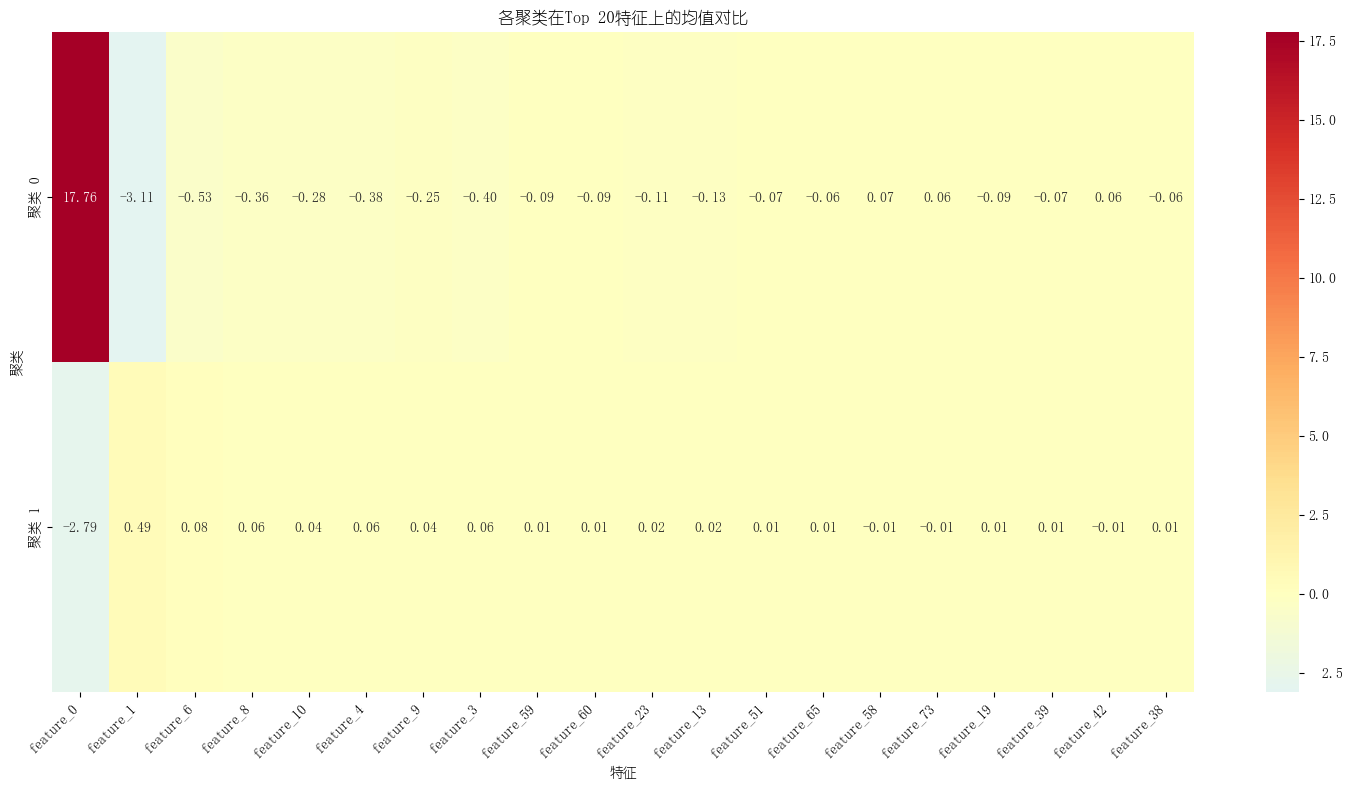

,feature_0,feature_1,feature_6,feature_8,feature_10,feature_4,feature_9,feature_3,feature_59,feature_60,feature_23,feature_13,feature_51,feature_65,feature_58,feature_73,feature_19,feature_39,feature_42,feature_38
聚类 0,17.764697,-3.113892,-0.526831,-0.358138,-0.282762,-0.380830,-0.247683,-0.403450,-0.094057,-0.091101,-0.107120,-0.125567,-0.070508,-0.062480,0.065398,0.055085,-0.090910,-0.065467,0.061826,-0.060756
聚类 1,-2.788365,0.488760,0.082692,0.056214,0.044383,0.059775,0.038877,0.063326,0.014763,0.014299,0.016814,0.019709,0.011067,0.009807,-0.010265,-0.008646,0.014269,0.010276,-0.009704,0.009536


In [35]:
cluster_comparison_heatmap(feature_names=feature_names_ana,unique_labels=unique_labels_k2,data=data_analysis,labels_ana=labels_k2)


绘制重要特征的分布对比图...


C:\Users\xxin\AppData\Local\Temp\ipykernel_8508\3697735641.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


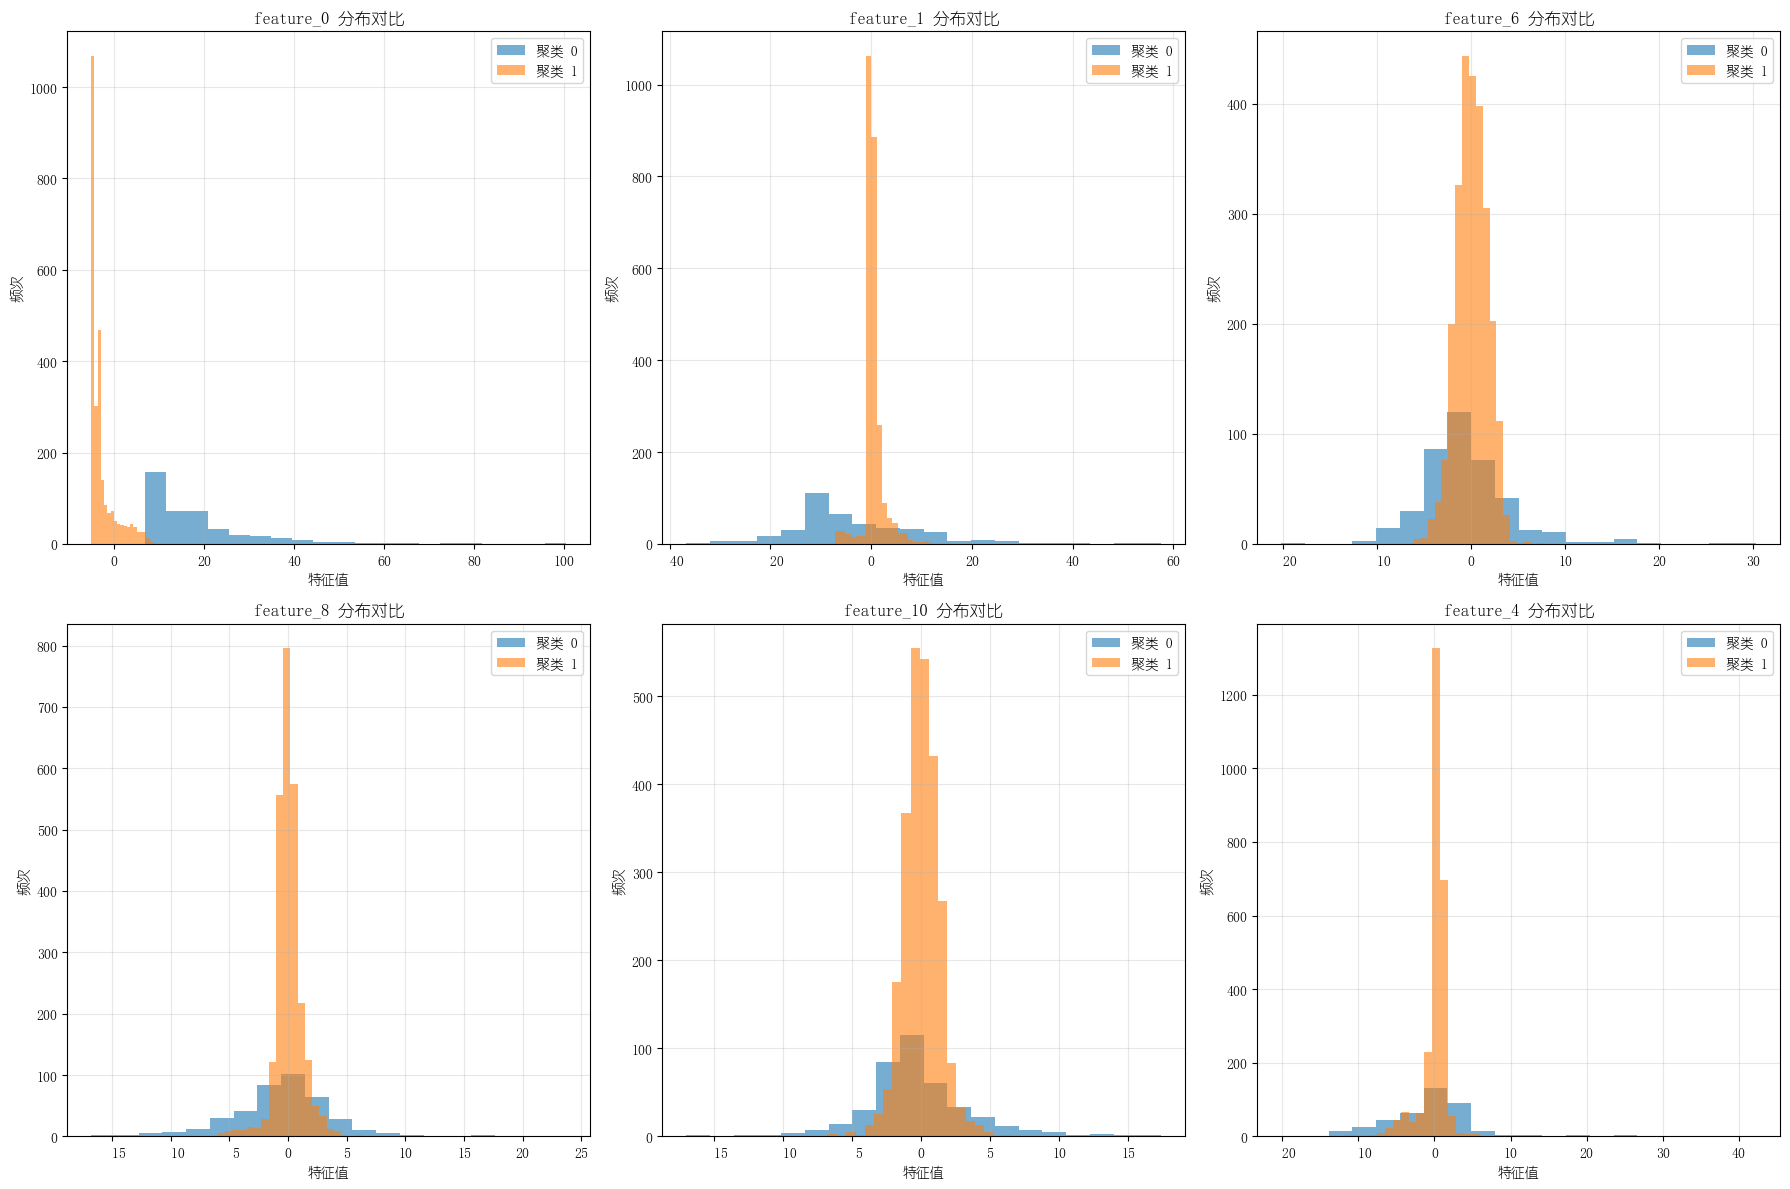

In [36]:
cluster_distribution_analysis(feature_names=feature_names_ana,unique_labels=unique_labels_k2,data=data_analysis,labels_ana=labels_k2)

k=5

In [37]:
if isinstance(pca_data, pd.DataFrame):
    data_analysis = pca_data
    feature_names = pca_data.columns.tolist()
else:
    data_analysis = pd.DataFrame(pca_data)
    feature_names_ana = [f'feature_{i}' for i in range(pca_data.shape[1])]
    data_analysis.columns = feature_names_ana
        
    unique_labels_k5 = np.unique(labels_k5[labels_k5 != -1]) 
    n_clusters = len(unique_labels_k5)
        
    # 添加聚类标签到数据框
    data_with_labels = data_analysis.copy()
    data_with_labels['cluster'] = labels_k5
        
    print(f"数据维度_k5: {data_analysis.shape}")
    print(f"聚类数量_k5: {n_clusters}")

数据维度_k5: (3000, 76)
聚类数量_k5: 5


In [38]:
generate_cluster_report(feature_names=feature_names_ana,unique_labels=unique_labels_k5,data=data_analysis,labels_ana=labels_k5)


聚类分析完整报告

各聚类汇总统计
+----+----------+------------+---------------+------------+--------------+--------------+
|    |   聚类ID |   样本数量 |   样本比例(%) |   特征均值 |   特征标准差 |   特征中位数 |
+====+==========+============+===============+============+==============+==============+
|  0 |        0 |       2368 |         78.93 | -0.0279881 |      1.03001 |   -0.0260481 |
+----+----------+------------+---------------+------------+--------------+--------------+
|  1 |        1 |        311 |         10.37 |  0.0286026 |      1.73319 |    0.0222931 |
+----+----------+------------+---------------+------------+--------------+--------------+
|  2 |        2 |        275 |          9.17 |  0.032595  |      1.75067 |   -0.0222956 |
+----+----------+------------+---------------+------------+--------------+--------------+
|  3 |        3 |         26 |          0.87 |  1.23957   |      3.6459  |    0.987149  |
+----+----------+------------+---------------+------------+--------------+--------------+
|  4 |        4


绘制聚类特征对比热力图...


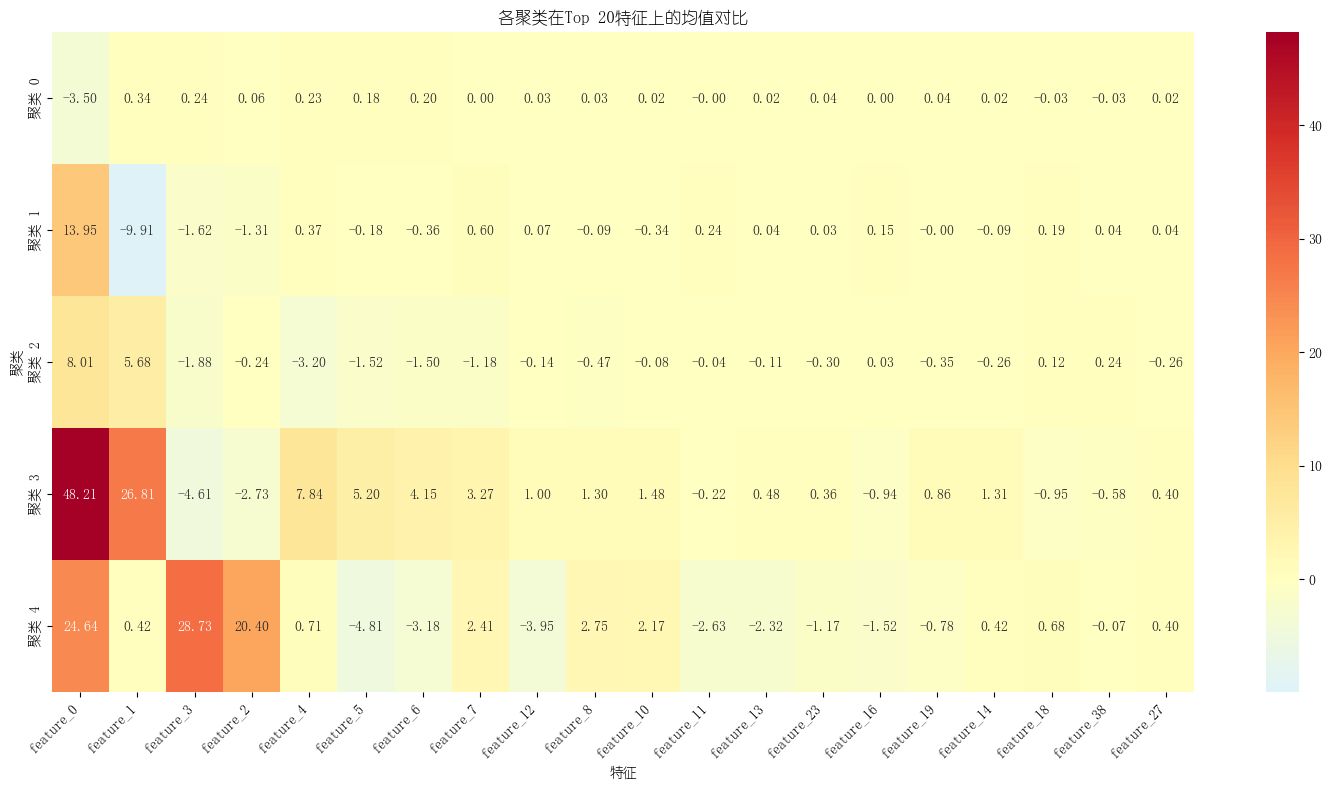

,feature_0,feature_1,feature_3,feature_2,feature_4,feature_5,feature_6,feature_7,feature_12,feature_8,feature_10,feature_11,feature_13,feature_23,feature_16,feature_19,feature_14,feature_18,feature_38,feature_27
聚类 0,-3.500825,0.344957,0.239007,0.057989,0.230166,0.184354,0.202001,0.002902,0.029295,0.028191,0.019200,-0.001822,0.021356,0.036510,0.000827,0.038010,0.023558,-0.033580,-0.026372,0.017097
聚类 1,13.954267,-9.913616,-1.621802,-1.312658,0.374781,-0.180652,-0.357693,0.596812,0.068978,-0.087925,-0.337533,0.237184,0.040826,0.034184,0.146748,-0.004450,-0.087242,0.189045,0.043737,0.038966
聚类 2,8.013500,5.675624,-1.877632,-0.241037,-3.198785,-1.524966,-1.496188,-1.184751,-0.138001,-0.466289,-0.081003,-0.040736,-0.106286,-0.301628,0.026416,-0.346571,-0.258598,0.115297,0.237423,-0.258441
聚类 3,48.214120,26.810970,-4.606576,-2.726428,7.837909,5.198336,4.150211,3.270244,1.004759,1.299721,1.475594,-0.219807,0.475219,0.357084,-0.942046,0.855000,1.307747,-0.948046,-0.576105,0.402518
聚类 4,24.644794,0.419754,28.726568,20.404500,0.714505,-4.807933,-3.177437,2.414942,-3.949824,2.751235,2.170857,-2.626672,-2.319764,-1.171144,-1.518389,-0.777371,0.423002,0.683406,-0.073311,0.400040


In [39]:
cluster_comparison_heatmap(feature_names=feature_names_ana,unique_labels=unique_labels_k5,data=data_analysis,labels_ana=labels_k5)


绘制重要特征的分布对比图...


C:\Users\xxin\AppData\Local\Temp\ipykernel_8508\3697735641.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


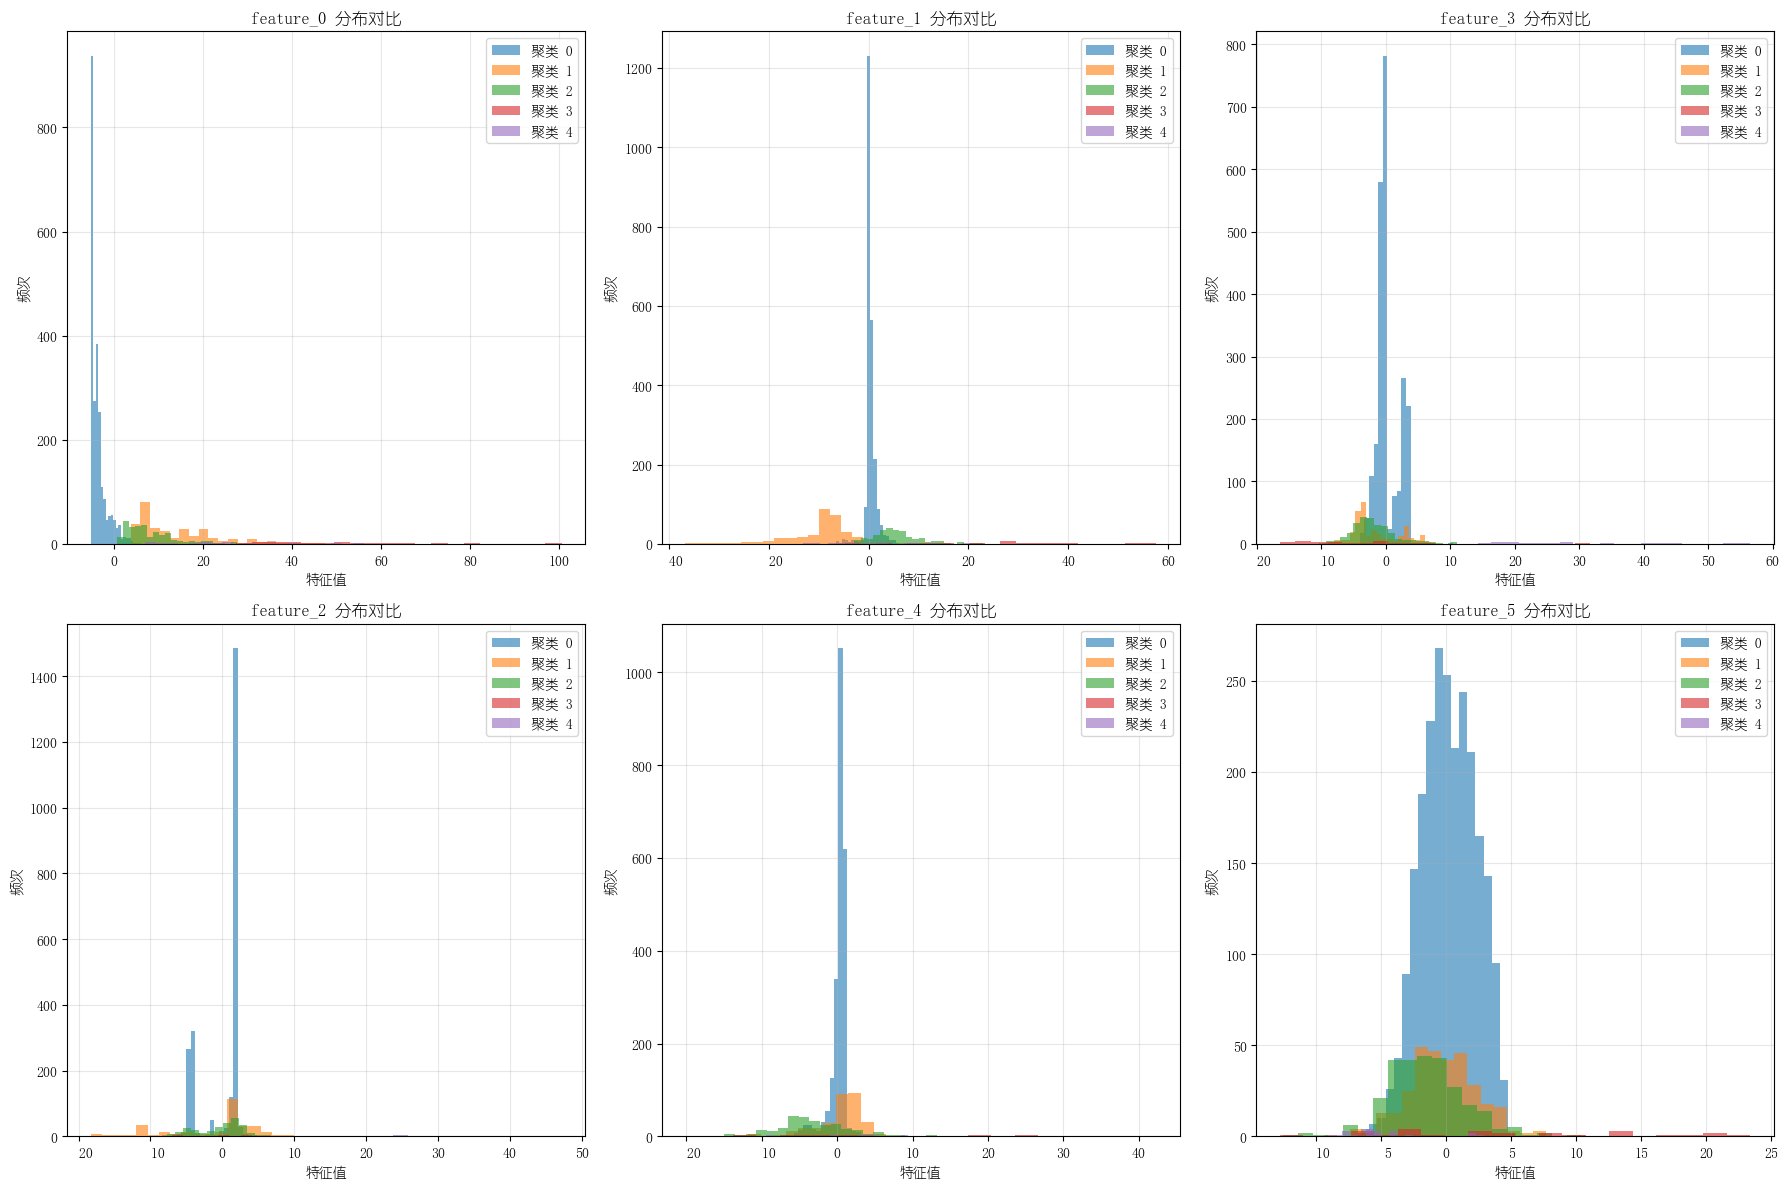

In [40]:
cluster_distribution_analysis(feature_names=feature_names_ana,unique_labels=unique_labels_k5,data=data_analysis,labels_ana=labels_k5)

# 分类

## 数据集处理+PCA降维

In [41]:
train_data = data_4.drop(columns='y')
label_data = data_4['y']

#标准化
train_data_scaled = scaler.fit_transform(train_data)

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(train_data_scaled,label_data,test_size=0.2,random_state=42,stratify=label_data)

In [43]:
#降维
X_train_pca=pca_model.fit_transform(X_train)
X_test_pca=pca_model.transform(X_test)

In [44]:
X_train.shape[1]

265

In [45]:
X_train_pca.shape[1]

73

In [46]:
pca_model.explained_variance_ratio_.sum()

0.9505726669832073

## 逻辑回归

In [47]:
models_class={}
results_class={}

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
        
lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lr.fit(X_train_pca, y_train)
        
best_lr = grid_search_lr.best_estimator_
models_class['PCA_LR'] = best_lr
        
print(f"最优参数: {grid_search_lr.best_params_}")
print(f"交叉验证AUC: {grid_search_lr.best_score_:.4f}")
        
y_pred_lr = best_lr.predict(X_test_pca)
y_prob_lr = best_lr.predict_proba(X_test_pca)[:, 1]
        
results_class['PCA_LR'] = {
    'y_pred': y_pred_lr,
    'y_prob': y_prob_lr,
    'model': best_lr
}

最优参数: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
交叉验证AUC: 0.7174


## SVM

In [49]:
from sklearn.svm import SVC

param_grid_svm = [
    {
        'C': [0.1, 1, 10],
        'kernel': ['linear']
    },
    {
        'C': [1, 10],
        'gamma': ['scale', 0.01],
        'kernel': ['rbf']
    }
]
        
svm = SVC(random_state=42, probability=True, cache_size=1000)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
        
print("开始SVM参数搜索...")
grid_search_svm.fit(X_train_pca, y_train)
        
best_svm = grid_search_svm.best_estimator_
models_class['PCA_SVM'] = best_svm
        
print(f"最优参数: {grid_search_svm.best_params_}")
print(f"交叉验证AUC: {grid_search_svm.best_score_:.4f}")
        
y_pred_svm = best_svm.predict(X_test_pca)
y_prob_svm = best_svm.predict_proba(X_test_pca)[:, 1]
        
results_class['PCA_SVM'] = {
    'y_pred': y_pred_svm,
    'y_prob': y_prob_svm,
    'model': best_svm
}

开始SVM参数搜索...
Fitting 3 folds for each of 7 candidates, totalling 21 fits
最优参数: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
交叉验证AUC: 0.6692


## 感知机

In [50]:
from sklearn.neural_network import MLPClassifier


param_grid_mlp = {
    'hidden_layer_sizes': [(128,), (256,), (128, 64), (256, 128), (512, 256)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500]
}
        
mlp = MLPClassifier(random_state=42, early_stopping=True, 
                           validation_fraction=0.1, n_iter_no_change=10)
        
        
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)
        
best_mlp = grid_search_mlp.best_estimator_
models_class['MLP'] = best_mlp
        
print(f"最优参数: {grid_search_mlp.best_params_}")
print(f"交叉验证AUC: {grid_search_mlp.best_score_:.4f}")
        
y_pred_mlp = best_mlp.predict(X_test)
y_prob_mlp = best_mlp.predict_proba(X_test)[:, 1]
        
results_class['MLP'] = {
    'y_pred': y_pred_mlp,
    'y_prob': y_prob_mlp,
    'model': best_mlp
}

最优参数: {'alpha': 0.01, 'hidden_layer_sizes': (256,), 'learning_rate_init': 0.001, 'max_iter': 500}
交叉验证AUC: 0.6667


# 评估

KS值计算函数

In [51]:
from scipy import stats

def calculate_ks_statistic(y_true, y_prob):
        """
        计算K-S统计量
        
        参数:
        y_true: 真实标签
        y_prob: 预测概率
        
        返回:
        ks_stat: K-S统计量
        ks_pvalue: p值
        max_ks: 最大K-S值
        """

        # 分别获取正负样本的预测概率
        pos_scores = y_prob[y_true == 1]
        neg_scores = y_prob[y_true == 0]
        
        # 计算K-S统计量
        ks_stat, ks_pvalue = stats.ks_2samp(pos_scores, neg_scores)
        
        
        return {
            'ks_statistic': ks_stat,
            'ks_pvalue': ks_pvalue,
        }

## 评估函数

In [52]:
from sklearn.metrics import (classification_report, confusion_matrix, 
                           roc_auc_score,accuracy_score, f1_score)



def evaluate_model(model_name, y_pred, y_prob):
        """模型评估 (包含K-S统计量)"""
        print(f"\n=== {model_name} 评估结果 ===")
        
        # 基础指标
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        
        # K-S统计量
        ks_results = calculate_ks_statistic(y_test, y_prob)
        
        print(f"准确率: {accuracy:.4f}")
        print(f"F1分数: {f1:.4f}")
        print(f"AUC-ROC: {auc:.4f}")
        print(f"K-S统计量: {ks_results['ks_statistic']:.4f}")
        
        # 混淆矩阵
        cm = confusion_matrix(y_test, y_pred)
        print(f"\n混淆矩阵:")
        print(cm)
        
        return {
            'accuracy': accuracy,
            'f1_score': f1,
            'auc_roc': auc,
            'ks_statistic': ks_results['ks_statistic'],
            'confusion_matrix': cm
        }

In [53]:
models_results ={}

In [54]:
models_results['PCA_LR'] = evaluate_model('PCA + 逻辑回归', y_pred_lr, y_prob_lr)


=== PCA + 逻辑回归 评估结果 ===
准确率: 0.8783
F1分数: 0.1978
AUC-ROC: 0.7349
K-S统计量: 0.3516

混淆矩阵:
[[518  10]
 [ 63   9]]


In [55]:
models_results['PCA_SVM'] = evaluate_model('PCA + SVM', y_pred_svm, y_prob_svm)


=== PCA + SVM 评估结果 ===
准确率: 0.8783
F1分数: 0.0000
AUC-ROC: 0.7209
K-S统计量: 0.3984

混淆矩阵:
[[527   1]
 [ 72   0]]


In [56]:
models_results['MLP'] = evaluate_model('多层感知机', y_pred_mlp, y_prob_mlp)


=== 多层感知机 评估结果 ===
准确率: 0.8783
F1分数: 0.1609
AUC-ROC: 0.7104
K-S统计量: 0.3258

混淆矩阵:
[[520   8]
 [ 65   7]]


# 可视化

In [57]:
from sklearn.metrics import (confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve,
                           accuracy_score, f1_score)
import seaborn as sns

def plot_results():
        """绘制结果对比图 (包含K-S曲线)"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # ROC曲线
        ax1 = axes[0, 0]
        for model_name, result in results_class.items():
            fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
            auc = roc_auc_score(y_test, result['y_prob'])
            ax1.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')
        
        ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        ax1.set_xlabel('假正率')
        ax1.set_ylabel('真正率')
        ax1.set_title('ROC曲线对比')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        
        # K-S曲线
        ax3 = axes[0, 1]
        for model_name, result in results_class.items():
            fpr, tpr, thresholds = roc_curve(y_test, result['y_prob'])
            ks_curve = tpr - fpr
            ax3.plot(thresholds, ks_curve, label=f'{model_name}')
        
        ax3.set_xlabel('阈值')
        ax3.set_ylabel('K-S值 (TPR - FPR)')
        ax3.set_title('K-S曲线对比')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 性能指标对比
        ax4 = axes[0, 2]
        models = list(results_class.keys())
        metrics = ['accuracy', 'f1_score', 'auc_roc', 'ks_statistic']
        metric_names = ['准确率', 'F1分数', 'AUC-ROC', 'K-S值']
        
        x = np.arange(len(models))
        width = 0.2
        
        for i, metric in enumerate(metrics):
            values = []
            for model_name in models:
                if metric == 'accuracy':
                    values.append(accuracy_score(y_test, results_class[model_name]['y_pred']))
                elif metric == 'f1_score':
                    values.append(f1_score(y_test, results_class[model_name]['y_pred']))
                elif metric == 'auc_roc':
                    values.append(roc_auc_score(y_test, results_class[model_name]['y_prob']))
                elif metric == 'ks_statistic':
                    ks_results = calculate_ks_statistic(y_test, results_class[model_name]['y_prob'])
                    values.append(ks_results['ks_statistic'])
            
            ax4.bar(x + i*width, values, width, label=metric_names[i])
        
        ax4.set_xlabel('模型')
        ax4.set_ylabel('分数')
        ax4.set_title('性能指标对比')
        ax4.set_xticks(x + width * 1.5)
        ax4.set_xticklabels(models)
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        # 混淆矩阵热力图 (以第一个模型为例)
        ax5 = axes[1, 0]
        first_result = list(results_class.values())[0]
        cm = confusion_matrix(y_test, first_result['y_pred'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax5)
        ax5.set_title(f'{list(results_class.keys())[0]} 混淆矩阵')
        ax5.set_xlabel('预测标签')
        ax5.set_ylabel('真实标签')

        ax6 = axes[1, 1]
        first_result = list(results_class.values())[1]
        cm = confusion_matrix(y_test, first_result['y_pred'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax6)
        ax6.set_title(f'{list(results_class.keys())[1]} 混淆矩阵')
        ax6.set_xlabel('预测标签')
        ax6.set_ylabel('真实标签')

        ax7 = axes[1, 2]
        first_result = list(results_class.values())[2]
        cm = confusion_matrix(y_test, first_result['y_pred'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax7)
        ax7.set_title(f'{list(results_class.keys())[2]} 混淆矩阵')
        ax7.set_xlabel('预测标签')
        ax7.set_ylabel('真实标签')
        
        
        plt.tight_layout()
        plt.show()

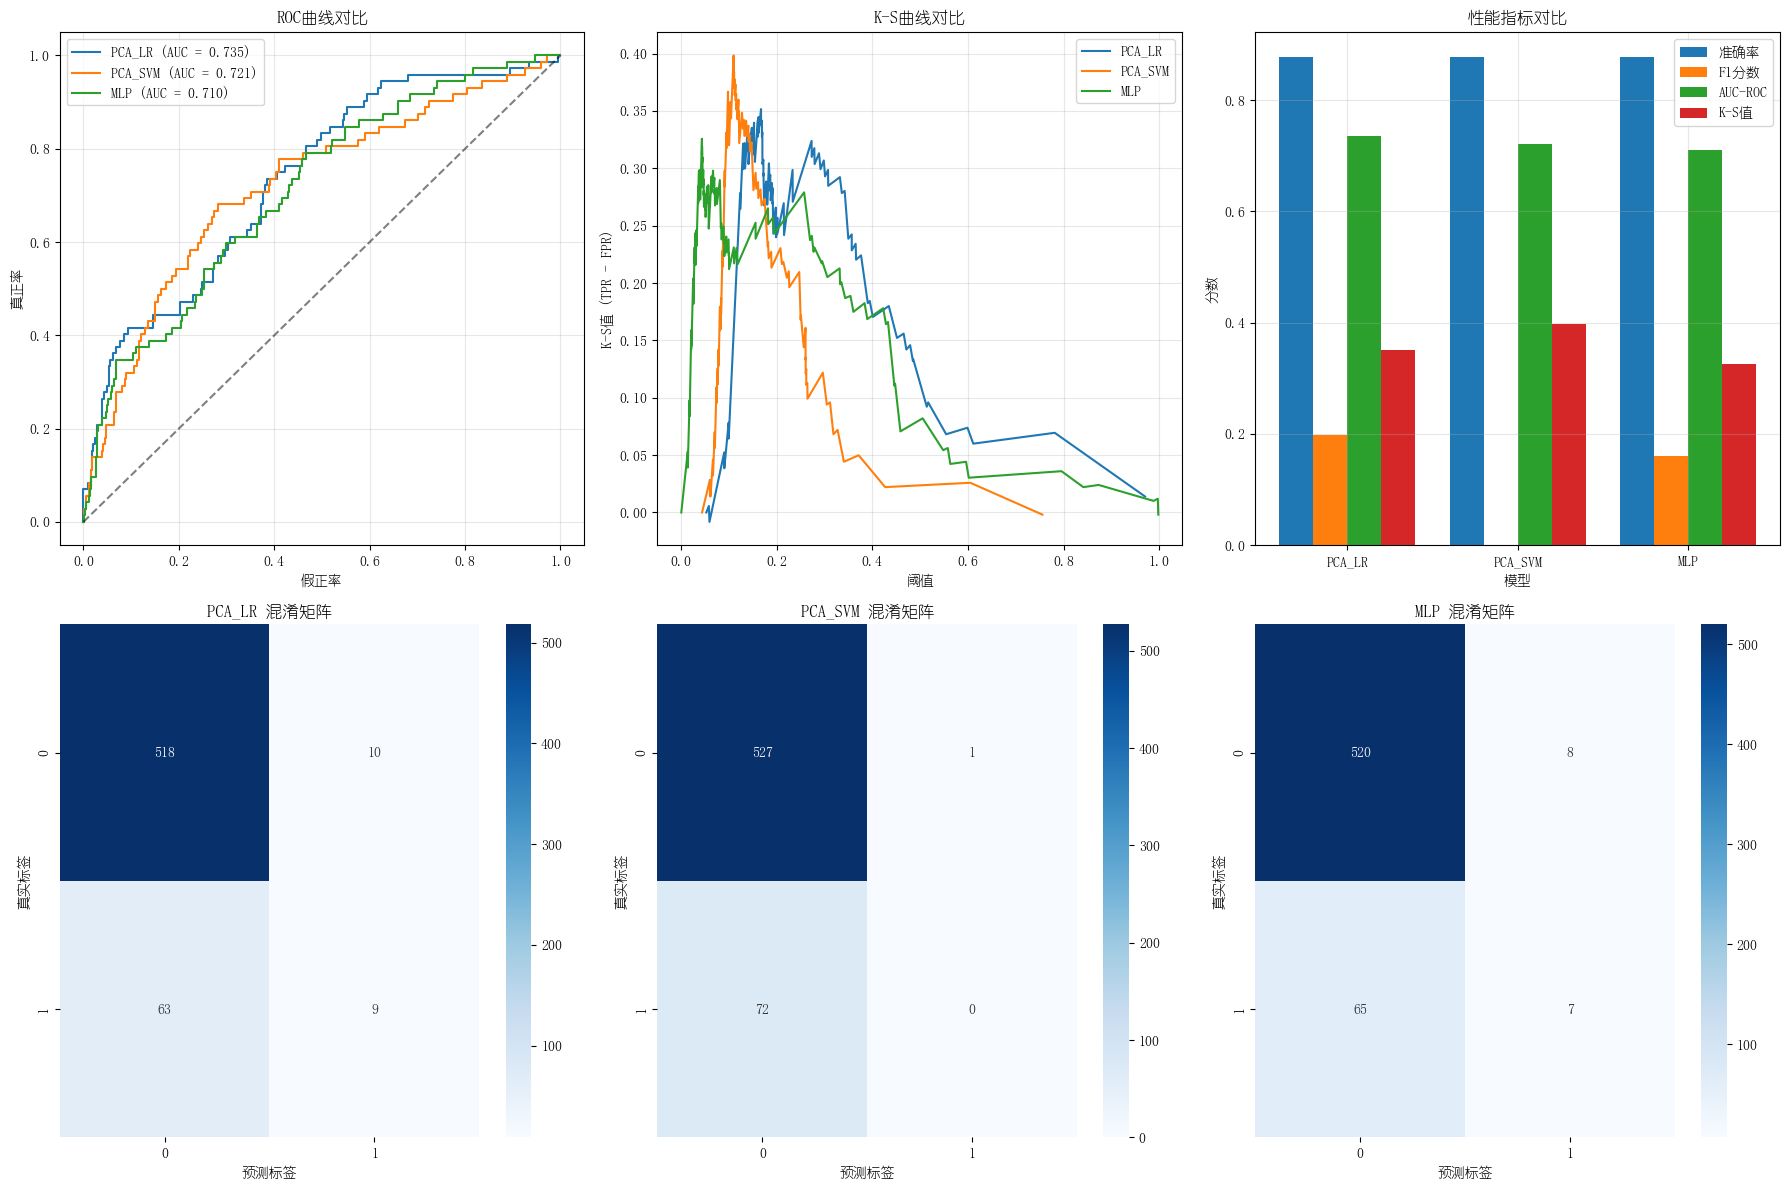

In [58]:
plot_results()